<a href="https://colab.research.google.com/github/descandon88/tesis_maestria/blob/main/analisisComplejidadEconomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
# Librerías para visualizacion
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import re
import networkx as nx
from itertools import count
from itertools import combinations
from itertools import product
import statsmodels.api as sm
import urllib.request, json
!pip3 install geopandas
import geopandas
# -- set scientific notation to display numbers fully rather than exponential
pd.set_option('display.float_format', '{:.2f}'.format)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import seaborn as sns
sns.set_style('whitegrid') # grids en dark background

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',300)
print('librerías cargadas')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
librerías cargadas


# Análisis de los datos contrade HS4 de Ecuador

En esta notebook, lo que se pretende es realizar un análisis exhaustivo de la base de exportaciones de productos que contiene Ecuador para el capítulo 1 de la tesis.

Se importa la base desde drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
## Se importa la base de exportaciones de productos drive
df_base = pd.read_csv("/content/drive/MyDrive/eci/base/df_updated.csv")
df_short_name = pd.read_csv("/content/drive/MyDrive/eci/base/df_tipo_pro.csv")

print('dataframes cargados')

dataframes cargados


In [4]:
df_base['product_code'] = df_base['product_code'].apply(lambda x: '{0:0>4}'.format(x))
# df['product_code']  = df['product_code'] .apply(np.int64)

df_base.sample(n=6)
df_base.info()

,year,country_code,country_name,product_code,product_name,export_value
7254349,2018,USA,United States of America,9605,"Travel sets; for personal toilet, sewing, shoe or clothes cleaning",10104293
1755298,2006,AND,Andorra,2829,Chlorates and perchlorates; bromates and perbromates; iodates and periodates,0
2930237,2000,FLK,Falkland Islands,4107,"Leather; of animals n.e.s. in chapter 41, without hair on, excluding leather of heading no. 4108 or 4109",0
4772181,1997,CAN,Canada,7110,"Platinum; unwrought or in semi-manufactured forms, or in powder form",63028540
4135831,2017,BHR,Bahrain,6116,"Gloves, mittens and mitts; knitted or crocheted",284260
1809964,2006,DEU,Germany,2838,"Fulminates, cyanates and thiocyanates",13171351


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373271 entries, 0 to 7373270
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   year          int64 
 1   country_code  object
 2   country_name  object
 3   product_code  object
 4   product_name  object
 5   export_value  int64 
dtypes: int64(2), object(4)
memory usage: 337.5+ MB


In [5]:
# df_test.sample(n=6)
# df_test['hs_product_code'] = df_test['hs_product_code'].apply(np.int64)
df_short_name.rename(columns={"hs_product_code": "product_code"}, inplace=True)
df_short_name.rename(columns={"hs_product_name_short_en": "product_short_name"}, inplace=True)


df_short_name.sample(n=15)

df_short_name.info()
df_short_name['product_id'].nunique()
df_short_name['product_code'].nunique()

# df_test[ (df_test['country_name']=='Ecuador')].sort_values(by=['year'],ascending=False)[['index','country_iso_code','tech','year']][0:30]


,product_id,product_code,product_short_name
4477,8116,701931,Mats of glass fibres
3715,7354,540620,"Artificial filament yarn, retail"
2928,6567,370610,"Cinematographic film, width >35mm"
298,835,2206,Other fermented beverages
6125,9764,902580,"Hydrometer, pyrometer"
6398,10037,999999,"Commodities not specified, according to kind"
2577,6216,291719,"Acyclic polycarboxylic acids, nes"
989,1526,7410,Copper foil < 0.15 mm thick
5271,8910,842619,Transporter or bridge cranes
2984,6623,382330,Non-agglomerated metal carbides


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6406 entries, 0 to 6405
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          6406 non-null   int64 
 1   product_code        6406 non-null   object
 2   product_short_name  6406 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.3+ KB


6406

6396

### Aplico un merge para agregar el nombre corto del producto al dataframe principal

In [6]:
df_base['product_code'].nunique()
    # df_all = pd.merge(df_all,data[[anio_col,pais_col,prod_col,prod_code,value_col]],how='left',on=[anio_col,pais_col,prod_col])

# df['product_code'].nunique()
# df = pd.merge(df_base, df_short_name[['product_code','short_name']],how='right', on=['product_code']).copy()
df = pd.merge(df_base, df_short_name[['product_code','product_short_name']],how='inner', on='product_code').copy()

df.head()

1242

,year,country_code,country_name,product_code,product_name,export_value,product_short_name
0,1995,ABW,Aruba,0101,"Horses, asses, mules and hinnies; live",18008,Horses
1,1996,ABW,Aruba,0101,"Horses, asses, mules and hinnies; live",0,Horses
2,1997,ABW,Aruba,0101,"Horses, asses, mules and hinnies; live",0,Horses
3,1998,ABW,Aruba,0101,"Horses, asses, mules and hinnies; live",0,Horses
4,1999,ABW,Aruba,0101,"Horses, asses, mules and hinnies; live",14473,Horses


In [8]:
df_prueba = df[(df['product_code']=='0306')].copy()
df_prueba.head()

,year,country_code,country_name,product_code,product_name,export_value,product_short_name
125202,1995,ABW,Aruba,0306,"Crustaceans, in shell or not, live, fresh, chilled, frozen, dried, salted or in brine; crustaceans, in shell, cooked by steaming or boiling in water, chilled or not, frozen, dried, salted or in brine",0,Crustaceans
125203,1996,ABW,Aruba,0306,"Crustaceans, in shell or not, live, fresh, chilled, frozen, dried, salted or in brine; crustaceans, in shell, cooked by steaming or boiling in water, chilled or not, frozen, dried, salted or in brine",1408,Crustaceans
125204,1997,ABW,Aruba,0306,"Crustaceans, in shell or not, live, fresh, chilled, frozen, dried, salted or in brine; crustaceans, in shell, cooked by steaming or boiling in water, chilled or not, frozen, dried, salted or in brine",6620,Crustaceans
125205,1998,ABW,Aruba,0306,"Crustaceans, in shell or not, live, fresh, chilled, frozen, dried, salted or in brine; crustaceans, in shell, cooked by steaming or boiling in water, chilled or not, frozen, dried, salted or in brine",56542,Crustaceans
125206,1999,ABW,Aruba,0306,"Crustaceans, in shell or not, live, fresh, chilled, frozen, dried, salted or in brine; crustaceans, in shell, cooked by steaming or boiling in water, chilled or not, frozen, dried, salted or in brine",242243,Crustaceans


Finding specific countries / products based on partial string matching
If you’re interested in finding data on certain countries / products but not sure how exactly these are spelled in the data (or are spelled with / without e.g. capital letters)

In [9]:
STRING = 'Netherland'
df[df['country_name'].str.contains(STRING)][['country_name']].drop_duplicates()

STRING = 'wine'
df[df['product_name'].str.contains(STRING,flags=re.IGNORECASE, regex=True)][['product_name']].drop_duplicates()

,country_name
156,Netherlands Antilles
3711,Netherlands


,product_name
11924,Swine; live
47696,"Meat of swine; fresh, chilled or frozen"
65582,"Edible offal of bovine animals, swine, sheep, goats, horses, asses, mules or hinnies; fresh, chilled or frozen"
1084954,"Wine of fresh grapes, including fortified wines; grape must other than that of heading no. 2009"
1090916,"Vermouth and other wine of fresh grapes, flavoured with plants or aromatic substances"
1156498,Wine lees; argol
3855058,"Twine, cordage, ropes and cables, whether or not plaited or braided; whether or not impregnated, coated, covered or sheathed with rubber or plastics"
3861020,"Twine, cordage or rope; knotted netting, made up fishing nets and other made up nets, of textile materials"
3866982,"Articles of yarn, strip or the like of heading no. 5404 or 5405; twine, cordage, rope or cables n.e.s. or included"
4302208,"Rags; used or new, scrap twine, cordage, rope and cables and worn out articles of twine, cordage, rope or cables, of textile materials"


##¿Cómo fue la evolución de exportaciones de petróleo del Ecuador? 

Text(0.5, 1.0, 'Exportaciones de Crudo del Ecuador desde 2000 - 2019')

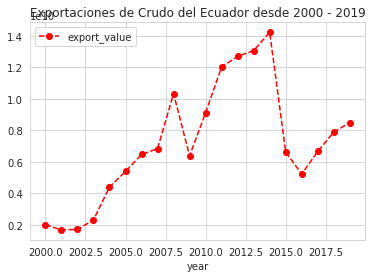

In [10]:
df_ec = df[ (df['country_code']=='ECU') & (df['year']<2020)& (df['year']>1999)].copy()

## 2709 refiere al código del producto de Petroleum oils and oils obtained from bituminous minerals; crude	
df_ec_2709 = df_ec[df_ec['product_code']=='2709']

df_ec_2709.plot(x='year', y='export_value', style="ro--")

plt.grid(True)
plt.title('Exportaciones de Crudo del Ecuador desde 2000 - 2019')
#showing the plot
plt.show()

<Figure size 576x360 with 0 Axes>

Text(0.0, 1.0, 'Figura 1: Exportaciones de Crudo/Petróleo del Ecuador desde 2000 - 2019')

Text(0.5, 0, 'Años')

Text(0, 0.5, 'USD 10 mil millones')

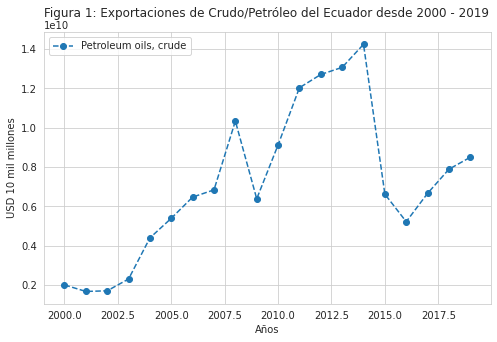

In [11]:
#df3 = df2[df2['product_name']=='Cars']

df1_ec = df_ec[df_ec['product_code']=='2709']
# df2_ec = df_ec[df_ec['product_code']=='803']
# df3_ec = df_ec[df_ec['product_code']=='603']
# df4_ec = df_ec[df_ec['product_code']=='306']
# df5_ec = df_ec[df_ec['product_code']=='1604']
# df6_ec = df_ec[df_ec['product_code']=='2710']


plt.figure(figsize=(8,5))

plt.plot("year", "export_value", marker='o', linestyle='dashed',data=df1_ec, label = "Petroleum oils, crude")
# plt.plot("year", "export_value", data=df2_ec, label = "Bananas, including plantains; fresh or dried")
# plt.plot("year", "export_value", data=df3_ec, label = "Flowers; cut flowers and flower buds of a kind suitable for bouquets or for ornamental purposes, fresh, dried, dyed, bleached, impregnated or otherwise prepared")
# plt.plot("year", "export_value", data=df4_ec, label = "Crustaceans, in shell or not, live, fresh, chilled, frozen, dried, salted or in brine; crustaceans, in shell, cooked by steaming or boiling in water, chilled or not, frozen, dried, salted or in brine")
# plt.plot("year", "export_value", data=df5_ec, label="Prepared or preserved fish; caviar and caviar substitutes prepared from fish eggs")
# plt.plot("year", "export_value", data=df6_ec, label="Petroleum oils, oils from bituminous minerals, not crude; preparations n.e.s. containing less than 70% petroleum oils, oils from bituminous minerals; these being the basic constituents of the preparations")

plt.title('Figura 1: Exportaciones de Crudo/Petróleo del Ecuador desde 2000 - 2019',
          fontsize=12,
    pad=15,
    loc="left")
plt.xlabel('Años')
plt.ylabel('USD 10 mil millones')

plt.legend()
plt.show()

Evolución de los 6 mayores productos de exportación en el 2019.

<Figure size 720x576 with 0 Axes>

Text(0.0, 1.0, 'Bananas y Mariscos han mantenido un crecimiento sostenido')

Text(0.126, 0.96, 'Figura 2: Evolución de los TOP 10 de mayor exportación en el 2019')

Text(0.5, 0, 'Años')

Text(0, 0.5, 'USD 10 mil millones')

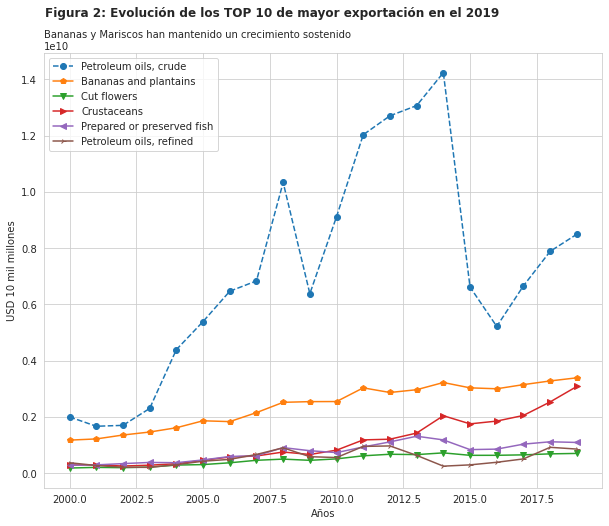

In [12]:

df1_ec = df_ec[df_ec['product_code']=='2709']
df2_ec = df_ec[df_ec['product_code']=='0803']
df3_ec = df_ec[df_ec['product_code']=='0603']
df4_ec = df_ec[df_ec['product_code']=='0306']
df5_ec = df_ec[df_ec['product_code']=='1604']
df6_ec = df_ec[df_ec['product_code']=='2710']
df7_ec = df_ec[df_ec['product_code']=='7108']
df8_ec = df_ec[df_ec['product_code']=='2008']
df9_ec = df_ec[df_ec['product_code']=='1801']
df10_ec = df_ec[df_ec['product_code']=='2616'] #Precious metal ores	




plt.figure(figsize=(10,8))

plt.plot("year", "export_value", marker='o', linestyle='dashed',data=df1_ec, label = "Petroleum oils, crude")
plt.plot("year", "export_value",marker='p', data=df2_ec, label = "Bananas and plantains")
plt.plot("year", "export_value",marker='v', data=df3_ec, label = "Cut flowers")
plt.plot("year", "export_value",marker='>', data=df4_ec, label = "Crustaceans")
plt.plot("year", "export_value",marker='<', data=df5_ec, label="Prepared or preserved fish")
plt.plot("year", "export_value",marker='4', data=df6_ec, label="Petroleum oils, refined")
# plt.plot("year", "export_value", marker='o',data=df7_ec, label = "Gold")
# plt.plot("year", "export_value", marker='o',data=df8_ec, label = "Fruits and nuts, otherwise prepared")
# plt.plot("year", "export_value",marker='4', data=df9_ec, label="Cocoa beans") #1801
# plt.plot("year", "export_value",marker='4', data=df10_ec, label="Precious metal ores") #1801


plt.title('Bananas y Mariscos han mantenido un crecimiento sostenido',  fontsize=10,
    pad=15,
    loc="left")
plt.suptitle(
    "Figura 2: Evolución de los TOP 10 de mayor exportación en el 2019",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",
)
plt.xlabel('Años')
plt.ylabel('USD 10 mil millones')

plt.legend()
plt.show()

##Evolución de los 10 productos No Petroleros (ni sus derivados) de mayor exportación en el 2019. 

<Figure size 720x576 with 0 Axes>

Text(0.0, 1.0, 'Precious metal ores aparece como uno de los productos no tradicionales de exportación que emerge desde el 2011.')

Text(0.126, 0.96, 'Figura 3: Evolución de los Top 10 No Petroleros de mayor exportación en el 2019')

Text(0.5, 0, 'Años')

Text(0, 0.5, 'USD mil millones')

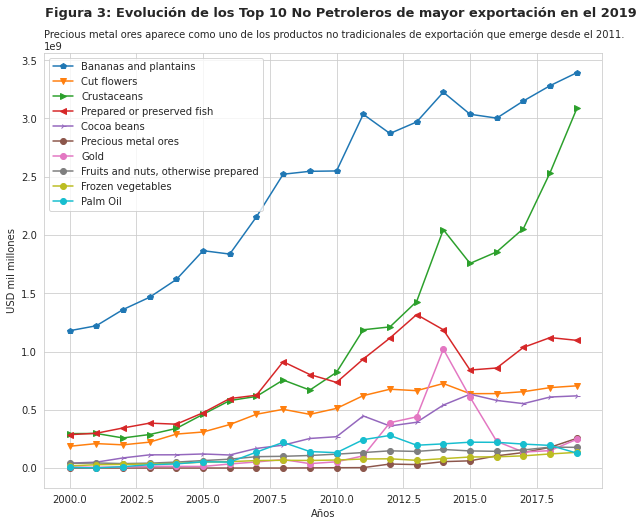

In [13]:

df1_ec = df_ec[df_ec['product_code']=='0803']
df2_ec = df_ec[df_ec['product_code']=='0603']
df3_ec = df_ec[df_ec['product_code']=='0306']
df4_ec = df_ec[df_ec['product_code']=='1604']
df5_ec = df_ec[df_ec['product_code']=='1801']
df6_ec = df_ec[df_ec['product_code']=='2616']
df7_ec = df_ec[df_ec['product_code']=='7108'] #Gold 2008
df8_ec = df_ec[df_ec['product_code']=='2008']
df9_ec = df_ec[df_ec['product_code']=='0710']#0710
df10_ec = df_ec[df_ec['product_code']=='1511']




plt.figure(figsize=(10,8))

plt.plot("year", "export_value",marker='p', data=df1_ec, label = "Bananas and plantains")
plt.plot("year", "export_value",marker='v', data=df2_ec, label = "Cut flowers")
plt.plot("year", "export_value",marker='>', data=df3_ec, label = "Crustaceans")
plt.plot("year", "export_value",marker='<', data=df4_ec, label="Prepared or preserved fish")
plt.plot("year", "export_value",marker='4', data=df5_ec, label="Cocoa beans")
plt.plot("year", "export_value", marker='o',data=df6_ec, label = "Precious metal ores")
plt.plot("year", "export_value", marker='o',data=df7_ec, label = "Gold")
plt.plot("year", "export_value", marker='o',data=df8_ec, label = "Fruits and nuts, otherwise prepared")
plt.plot("year", "export_value", marker='o',data=df9_ec, label = "Frozen vegetables")
plt.plot("year", "export_value", marker='o',data=df10_ec, label = "Palm Oil")



plt.title('Precious metal ores aparece como uno de los productos no tradicionales de exportación que emerge desde el 2011.',  fontsize=10,
    pad=15,
    loc="left")
plt.suptitle(
    "Figura 3: Evolución de los Top 10 No Petroleros de mayor exportación en el 2019",
    fontsize=13,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",
)
plt.xlabel('Años')
plt.ylabel('USD mil millones')

plt.grid(True)
plt.legend()
plt.show()

In [14]:

years=[2019]

df_ec_ex_2012 = df[(df['country_name']=='Ecuador')  & (df['year'].isin(years))].copy()
df_ec_ex_2016 = df[(df['country_name']=='Ecuador')  & (df['year'] == 2016) ].copy()

df_ec_ex_2012 = df_ec_ex_2012.groupby(['product_code','product_short_name','year'],as_index=False)['export_value'].sum()
df_ec_ex_2016 = df_ec_ex_2016.groupby(['product_code','product_name'],as_index=False)['export_value'].sum()


df_ec_ex_2012.sort_values(by=['export_value'],ascending=False,inplace=True)

df_ec_top10_2012 = df_ec_ex_2012.iloc[0:13, :].copy()
df_ec_top10_2012.sort_values(by=['export_value'],ascending=False,inplace=True)

df_ec_top10_2012.head(26)

,product_code,product_short_name,year,export_value
255,2709,"Petroleum oils, crude",2019,8495520256
62,0803,Bananas and plantains,2019,3392899328
21,0306,Crustaceans,2019,3085660672
144,1604,Prepared or preserved fish,2019,1095807616
256,2710,"Petroleum oils, refined",2019,860394496
44,0603,Cut flowers,2019,705645760
150,1801,Cocoa beans,2019,619411456
241,2616,Precious metal ores,2019,254867616
790,7108,Gold,2019,246594176
1217,9999,Commodities not specified according to kind,2019,244173872


In [15]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set_theme(style='darkgrid', rc={'figure.dpi': 147},              
#               font_scale=0.7)

# fig, ax = plt.subplots(figsize=(9, 2))

# top10 = df_ec_top10_2012['product_name'].value_counts().index[5:10]

# ax.set_title('Exportaciones de Ecuador')

# sns.barplot(x='product_name', y='export_value', data=df_ec_ex_2012, ax=ax, 
#             order=top10, ci=None, 
#             hue='year', hue_order=[2010, 2017])

# ax.legend(bbox_to_anchor=(1, 1), title='year');

# # ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# wrap_labels(ax, 10)
# ax.figure



# Initialize a Figure and an Axes
# fig, ax = plt.subplots()

# Fig size
# fig.set_size_inches(9,9)

# Create horizontal bars
# ax.barh(y=df_ec_top10_2012.product_name, width=df_ec_top10_2012.export_value);
# plt.yticks(rotation='horizontal',wrap=True)
# plt.text(5, 10, t, fontsize=18, style='oblique', ha='center',
#          va='top', wrap=True)
# Add title
# ax.set_title('Exportaciones de Ecuador en 2012');

#Calculo de RCA

In [16]:
## Función para el cálculo de RCA

def calc_rca(data,pais_col,prod_col,prod2_col,anio_col,value_col,prod_code):
    """
      La función que calcula la RCA
    
    """
    print('Creando las combinaciones de país-producto-tiempo')
    df_all = pd.DataFrame(list(product(data[anio_col].unique(), data[pais_col].unique(),data[prod_col].unique())))
    df_all.columns=[anio_col,pais_col,prod_col]
    print('Se procede a fusionar los datos')
    df_all = pd.merge(df_all,data[[anio_col,pais_col,prod_col,prod2_col,prod_code,value_col]],how='left',on=[anio_col,pais_col,prod_col])
    df_all.loc[df_all[value_col].isnull(),value_col] = 0

    # En esta parte se calculan propiedades
    print('calculando')
    df_all['Xcpt'] = df_all[value_col]
    df_all['Xct'] = df_all.groupby([pais_col, anio_col])[value_col].transform(sum)
    df_all['Xpt'] = df_all.groupby([prod_col, anio_col])[value_col].transform(sum)
    df_all['Xt'] = df_all.groupby([anio_col])[value_col].transform('sum')

    df_all['RCAcpt'] = (df_all['Xcpt']/df_all['Xct'])/(df_all['Xpt']/df_all['Xt']) #--> ecuación de las ventaja comparativa revelada RCA
    
    ## 0 si el producto / país tiene null en rca
    df_all.loc[df_all['RCAcpt'].isnull(),'RCAcpt'] = 0 
    df_all.loc[df_all[prod_code].isnull(),prod_code] = 0 

    df_all[prod_code] = df_all[prod_code].apply(np.int64)

    # drop the properties 
    df_all.drop(['Xcpt','Xct','Xpt','Xt'],axis=1,inplace=True,errors='ignore')

    return df_all


In [17]:
df_rca = calc_rca(data=df,pais_col='country_name',prod_col='product_name',prod2_col='product_short_name',anio_col='year',value_col='export_value',prod_code='product_code')

print('rca listo!!')

# Se muestran resultados
df_rca[0:10]

Creando las combinaciones de país-producto-tiempo
Se procede a fusionar los datos
calculando
rca listo!!


,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt
0,1995,Aruba,"Horses, asses, mules and hinnies; live",Horses,101,18008.00,0.13
1,1995,Aruba,Bovine animals; live,Bovine,102,0.00,0.00
2,1995,Aruba,Swine; live,Swine,103,0.00,0.00
3,1995,Aruba,Sheep and goats; live,Sheep,104,0.00,0.00
4,1995,Aruba,"Poultry; live, fowls of the species gallus domesticus, ducks, geese, turkeys and guinea fowls",Fowl,105,0.00,0.00
5,1995,Aruba,"Animals, n.e.s. in chapter 01; live",Other live animals,106,2336.00,0.05
6,1995,Aruba,Meat of bovine animals; fresh or chilled,Beef,201,0.00,0.00
7,1995,Aruba,Meat of bovine animals; frozen,Beef (frozen),202,0.00,0.00
8,1995,Aruba,"Meat of swine; fresh, chilled or frozen",Pork,203,0.00,0.00
9,1995,Aruba,"Meat of sheep or goats; fresh, chilled or frozen",Lamb,204,0.00,0.00


In [18]:
df_rca['country_name'].nunique()

242

###Se filtra el dataframe solo para Ecuador

In [19]:

# Ecuador
df_rca[ (df_rca['country_name']=='Ecuador')].sort_values(by=['RCAcpt'],ascending=False)[['product_short_name','product_code','export_value','RCAcpt','year']][0:10]


,product_short_name,product_code,export_value,RCAcpt,year
2176048,Bananas and plantains,803,1359788928.00,266.11,2002
2476612,Bananas and plantains,803,1465921280.00,245.41,2003
1875484,Bananas and plantains,803,1220851072.00,244.05,2001
1574920,Bananas and plantains,803,1178335104.00,241.97,2000
1274356,Bananas and plantains,803,1307284352.00,234.63,1999
6384612,Hat shapes,6502,6974446.00,233.22,2016
6383944,Bananas and plantains,803,3003076352.00,231.67,2016
673228,Bananas and plantains,803,1454392448.00,229.02,1997
6684508,Bananas and plantains,803,3150368512.00,227.59,2017
6985072,Bananas and plantains,803,3281817088.00,225.52,2018


####Se elabora un dataframe de RCA solo para los valores de Ecuador

In [20]:
df_rca_ec=df_rca[ (df_rca['country_name']=='Ecuador')].sort_values(by=['RCAcpt'],ascending=False)[['product_short_name','product_code','export_value','RCAcpt','year']]
df_rca_ec.head(20)

,product_short_name,product_code,export_value,RCAcpt,year
2176048,Bananas and plantains,803,1359788928.00,266.11,2002
2476612,Bananas and plantains,803,1465921280.00,245.41,2003
1875484,Bananas and plantains,803,1220851072.00,244.05,2001
1574920,Bananas and plantains,803,1178335104.00,241.97,2000
1274356,Bananas and plantains,803,1307284352.00,234.63,1999
6384612,Hat shapes,6502,6974446.00,233.22,2016
6383944,Bananas and plantains,803,3003076352.00,231.67,2016
673228,Bananas and plantains,803,1454392448.00,229.02,1997
6684508,Bananas and plantains,803,3150368512.00,227.59,2017
6985072,Bananas and plantains,803,3281817088.00,225.52,2018


### Gráfico de diversificación del exportaciones según su valor desde 2010 hasta 2019

In [21]:
a = df_rca_ec.copy()

exp_div_ec=a.groupby('year')['export_value'].apply(lambda x: (x>0).sum()).reset_index(name='export_diversity')

# exp_div_ec.head(5)
# a.sample(n=25)

years=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

exp_div_ec = exp_div_ec[(df['year'].isin(years))].copy()

exp_div_ec.head(5)


,year,export_diversity
5,2000,869
6,2001,868
7,2002,870
8,2003,868
9,2004,876


<Figure size 720x432 with 0 Axes>

Text(0.0, 1.0, 'Criterio: Se considera los productos que se han exportando en dicho periodo.')

Text(0.126, 0.96, 'Figura 4: Evolución de la canasta de exportaciones del Ecuador (2000 -2019)')

Text(0.5, 0, 'Años')

Text(0, 0.5, 'Diversidad (# de Productos)')

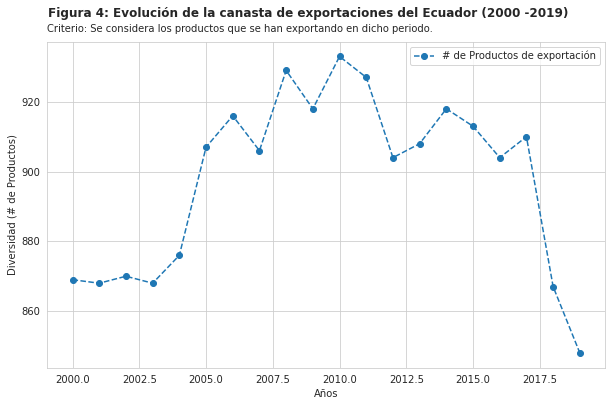

In [22]:


plt.figure(figsize=(10,6))

plt.plot("year", "export_diversity", marker='o', linestyle='dashed',data=exp_div_ec, label = "# de Productos de exportación")



plt.title('Criterio: Se considera los productos que se han exportando en dicho periodo.',  fontsize=10,
    pad=10,
    loc="left")
plt.suptitle(
    "Figura 4: Evolución de la canasta de exportaciones del Ecuador (2000 -2019)",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",
)
plt.xlabel('Años')
plt.ylabel('Diversidad (# de Productos)')

plt.legend()
plt.show()


### Gráfico de diversificación de exportaciones según RCA desde el 2010 hasta 2019

In [23]:
b = df_rca_ec.copy()

rca_div_ec=b.groupby('year')['RCAcpt'].apply(lambda x: (x>1).sum()).reset_index(name='RCA>1')

years=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

rca_div_ec = rca_div_ec[(df['year'].isin(years))].copy()

rca_div_ec.head(6)

,year,RCA>1
5,2000,99
6,2001,104
7,2002,99
8,2003,97
9,2004,90
10,2005,87


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Criterio: Evolución de productos con VCR>=1 en comparación a la diversidad de exportaciones en el mismo periodo')

Text(0.126, 0.96, 'Figura 4: EVOLUCIÓN DE LA DIVERSIDAD DE PRODUCTOS EXPORTADOS (2000-2019)')

Text(0.5, 0, 'Periodo')

Text(0, 0.5, 'Diversidad (# de Productos)')

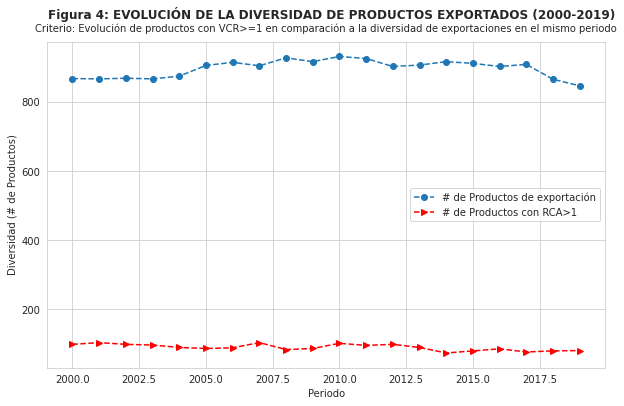

In [24]:
plt.figure(figsize=(10,6))

plt.plot("year", "export_diversity", marker='o', linestyle='dashed',data=exp_div_ec, label = "# de Productos de exportación")
plt.plot("year", "RCA>1", marker='>', linestyle='dashed',color = 'red',data=rca_div_ec, label = "# de Productos con RCA>1")



plt.title('Criterio: Evolución de productos con VCR>=1 en comparación a la diversidad de exportaciones en el mismo periodo',  fontsize=10,
    pad=10,
    loc="center")
plt.suptitle(
    "Figura 4: EVOLUCIÓN DE LA DIVERSIDAD DE PRODUCTOS EXPORTADOS (2000-2019)",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",
)
plt.xlabel('Periodo')
plt.ylabel('Diversidad (# de Productos)')

plt.legend()
plt.show()

### Unimos ambas gráficas en subplots

In [25]:
exports_merged = pd.merge(rca_div_ec, exp_div_ec[['year','export_diversity']],how='inner', on='year').copy()
exports_merged.head()

,year,RCA>1,export_diversity
0,2000,99,869
1,2001,104,868
2,2002,99,870
3,2003,97,868
4,2004,90,876


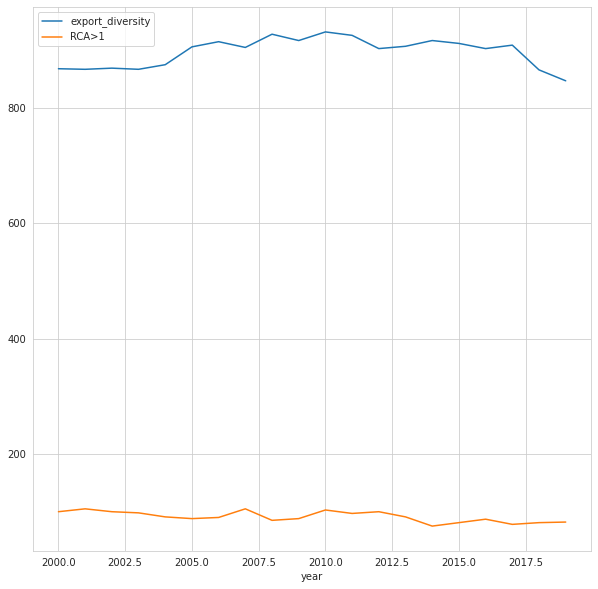

In [26]:
# plot multiple columns such as population and year from dataframe
exports_merged.plot(x="year", y=["export_diversity","RCA>1"],
        kind="line", figsize=(10, 10))
 
# display plot
plt.show()

# plot the dataframe
# exports_merged.plot(x="year", y=["RCA>1", "export_diversity"], kind="bar", figsize=(9, 8))
 
# # print bar graph
# plt.show()

### Análisis comparativo de RCA con países vecinos

In [27]:
vecinos=['Ecuador','Colombia','Bolivia','Venezuela','Brazil','Argentina','Peru','Uruguay']
# rca_div_ec = rca_div_ec[(df['year'].isin(years))].copy()

df_rca_vecinos=df_rca[ (df_rca['country_name'].isin(vecinos))].sort_values(by=['RCAcpt'],ascending=False)[['country_name','product_short_name','product_code','export_value','RCAcpt','year']].copy()
df_rca_vecinos.sample(n=8)



,country_name,product_short_name,product_code,export_value,RCAcpt,year
3859671,Uruguay,Drawn and blown glass,7004,0.00,0.00,2007
5783505,Ecuador,Plaster articles,6809,8582.00,0.00,2014
5302940,Peru,Railway construction material of iron or steel,7302,218783.00,0.02,2012
3340996,Brazil,Live Fish,301,5202344.00,0.32,2006
6021877,Argentina,Hand-woven tapestries,5805,0.00,0.00,2015
1839331,Brazil,Automatic regulating instruments,9032,79232888.00,0.68,2001
2957383,Uruguay,"Waters, flavored or sweetened",2202,294736.00,0.12,2004
2657391,Uruguay,Plaster articles,6809,3092.00,0.01,2003


In [28]:
rca_vecinos=df_rca_vecinos.groupby(['year','country_name'])['RCAcpt'].apply(lambda x: (x>1).sum()).reset_index(name='RCA>1')

years=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

rca_vecinos = rca_vecinos[(rca_vecinos['year'].isin(years))].copy()

rca_vecinos.head(5)

,year,country_name,RCA>1
40,2000,Argentina,222
41,2000,Bolivia,117
42,2000,Brazil,287
43,2000,Colombia,191
44,2000,Ecuador,99


In [29]:
table = pd.pivot_table(data=rca_vecinos,index=['year'],columns = ['country_name'],values=['RCA>1']).copy()
table= table.reset_index()

table.columns = table.columns.droplevel(0)
table.rename(columns={'': "year"}, inplace=True)
table = table.reset_index(drop=True)
# table = table.drop(columns=['country_name'])

# index=('falcon'
table.head()

country_name,year,Argentina,Bolivia,Brazil,Colombia,Ecuador,Peru,Uruguay,Venezuela
0,2000,222,117,287,191,99,182,181,69
1,2001,216,112,265,205,104,183,186,74
2,2002,209,100,266,201,99,179,175,74
3,2003,203,103,278,196,97,190,180,62
4,2004,216,101,281,209,90,179,172,61


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Criterio: Evolución de productos con VCR>=1 de Ecuador y países vecinos')

Text(0.126, 0.96, 'Figura 5: DIVERSIDAD DE PRODUCTOS EXPORTADOS DE PAÍSES VECINOS (2000-2019)')

Text(0.5, 0, 'Periodo')

Text(0, 0.5, 'VCR de Países')

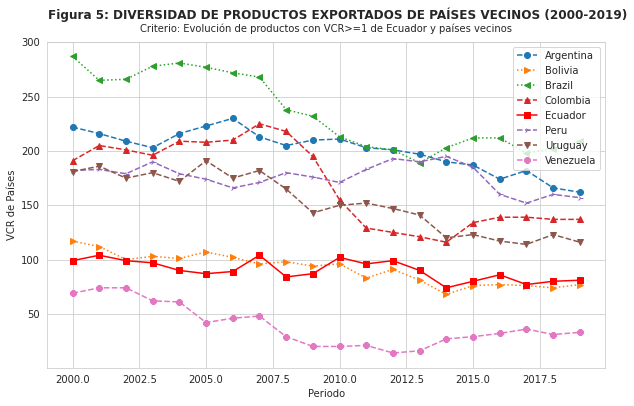

In [30]:
plt.figure(figsize=(10,6))

plt.plot("year", "Argentina", marker='o', linestyle='dashed',data=table, label = "Argentina")
plt.plot("year", "Bolivia", marker='>', linestyle='dotted',data=table, label = "Bolivia")
plt.plot("year", "Brazil", marker='<', linestyle='dotted', data=table, label = "Brazil")
plt.plot("year", "Colombia", marker='^', linestyle='dashed',data=table, label = "Colombia")
plt.plot("year", "Ecuador", marker='s', linestyle='solid',color = 'red',data=table, label = "Ecuador")
plt.plot("year", "Peru", marker='4', linestyle='dashed',data=table, label = "Peru")
plt.plot("year", "Uruguay", marker='v', linestyle='dashed',data=table, label = "Uruguay")
plt.plot("year", "Venezuela", marker='8', linestyle='dashed',data=table, label = "Venezuela")





plt.title('Criterio: Evolución de productos con VCR>=1 de Ecuador y países vecinos',  fontsize=10,
    pad=10,
    loc="center")
plt.suptitle(
    "Figura 5: DIVERSIDAD DE PRODUCTOS EXPORTADOS DE PAÍSES VECINOS (2000-2019)",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)
plt.xlabel('Periodo')
plt.ylabel('VCR de Países')

plt.legend()
plt.show()

# 3. Cálculos de Complejidad Económica

## 3.1 Cálculo de proximidades entre productos

### La medición de similitud entre productos i y j basado en la probabilidad condicional de tener RCA, que mide si un país es un exportador efectivo (RCA>1) de  un bien i o no (RCA<1). 
###Se crea el umbral Mcp que refiere a una nueva columna de tipo binaria donde asigna 0 cuando RCA<1 y 1 cuando RCA>1

In [50]:
df_rca['Mcp'] = 0
df_rca.loc[df_rca['RCAcpt']>1,'Mcp'] = 1

In [51]:
df_rca.sort_values(by=['year','RCAcpt'], ascending=False)

,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp
7518739,2020,Anguilla,"Lead; plates, sheets, strip and foil, lead powders and flakes",Lead foil <2mm,7804,2146256.00,20973.04,1
7568830,2020,Comoros,"Cloves; (whole fruit, cloves and stems)",Cloves,907,17140862.00,16496.34,1
7717340,2020,French Polynesia,"Pearls; natural or cultured, whether or not worked or graded but not strung, mounted or set; ungraded pearls, natural or cultured, temporarily strung for convenience of transport",Pearls,7101,24010362.00,14899.72,1
7756330,2020,Tonga,"Coral and similar materials, unworked or simply prepared, shells of molluscs, crustaceans or echinoderms and cuttle-bone, not cut to shape powder and waste thereof",Coral and shells,508,809310.00,11043.86,1
7710233,2020,Palau,Vessels and other floating structures; for breaking up,Floating structures for scrapping,8908,7225117.00,10304.04,1
...,...,...,...,...,...,...,...,...
300559,1995,Saint Barthélemy,"Sculptures and statuary; original, in any material",NaN,0,0.00,0.00,0
300560,1995,Saint Barthélemy,"Stamps, postage or revenue; stamp-postmarks, first-day covers, postal stationery (stamped paper) and like, used, or if unused not of current or new issue in the country to which they are destined",NaN,0,0.00,0.00,0
300561,1995,Saint Barthélemy,"Collections and collectors' pieces; of zoological, botanical, mineralogical, anatomical, historical, archaeological, palaeontological, ethnographic or numismatic interest",NaN,0,0.00,0.00,0
300562,1995,Saint Barthélemy,Antiques; of an age exceeding one hundred years,NaN,0,0.00,0.00,0


###A continuación, se procede a calcular la frecuencia con la que dos productos están presentes en los mismos países, utilizando el umbral de Mcp:

\begin{equation} 
C_{pp'} = \sum \limits_{c} M_{cp} M_{cp'}
\tag{1}
\end{equation}

###Para obtener un valor exacto de la proximidad del producto, se requiere corregir estos números en función de la medida en que los productos están presentes en general en los flujos comerciales entre países. Para ello, Hidalgo et al. (2007), calculan la proximidad del producto de la siguiente manera, definiéndola como el mínimo de dos probabilidades condicionales:

\begin{equation}
C_{ppt'}  = \min \left( \frac{C_{pp'}}{C_{p}},\frac{C_{pp'}}{C_{p'}} \right)
\tag{2}
\end{equation}

###Finalmente, la proximidad entre dos productos i y j se define como el mínimo de la probabilidad condicional de tener ventaja comparativa en uno de los dos, dado que se exporta el otro bien.Es decir,


![](https://drive.google.com/uc?export=view&id=1jzeSlcQbEqRZFXbRBIV78Jv89A8WcoSV

In [52]:
def calc_cppt(data,country_col,product_col):
    """
    Función para el cálculo de las co-ocurrencias en los países
    Retorna:
        Dataframe con valores de co-ocurrencias para cada par de producto
    """

    # Se crea combinaciones dentro del country_col (i.e. paises) por productos (i.e. products)
    dft = (data.groupby(country_col)[product_col].apply(lambda x: pd.DataFrame(list(combinations(x,2))))
            .reset_index(level=1, drop=True)
            .reset_index())
    dft.rename(columns={0:f'{product_col}_1'}, inplace=True)
    dft.rename(columns={1:f'{product_col}_2'}, inplace=True)

    # -- {product_col} 1 X {product_col} 2 == {product_col} 2 X {product_col} 1
    dft2 = dft.copy()
    dft2.rename(columns={f'{product_col}_1':f'{product_col}_2t'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2':f'{product_col}_1'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2t':f'{product_col}_2'}, inplace=True)
    # -- add second half
    dft3 = pd.concat([dft,dft2],axis=0,sort=False)

    # retiro de diagonales en caso de que estén presentes
    dft3 = dft3[ dft3[f'{product_col}_1'] != dft3[f'{product_col}_2'] ]

    # se calcula la cantindad N veces que los {product_col}s ocurren simultáneamente
    dft3['count'] = 1
    dft3 = dft3.groupby([f'{product_col}_1',f'{product_col}_2'],as_index=False)['count'].sum()
    dft3.rename(columns={f'count':f'Cpp'}, inplace=True)

    # Calculo de Ubicuidad
    df_ub = data.groupby(product_col,as_index=False)['Mcp'].sum()

    # merge del calculo de ubicuidad en la matriz de cpp 
    df_ub.rename(columns={f'{product_col}':f'{product_col}_1'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_1')

    df_ub.rename(columns={f'{product_col}_1':f'{product_col}_2'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_2')

    # Toma el min de probabilidades condicionales
    dft3['kpi'] = dft3['Cpp']/dft3['Mcp_x']
    dft3['kpj'] = dft3['Cpp']/dft3['Mcp_y']
    dft3['phi'] = dft3['kpi']
    dft3.loc[dft3['kpj']<dft3['kpi'],'phi'] = dft3['kpj']
    
    return dft3



In [53]:
# Filtro la base para el año 2019
dft = df_rca[df_rca['year']==2019].copy()

# Se mantienen las combinaciones de país-producto donde Mcp == 1 ( RCAcp> 1)
dft = dft[dft['Mcp']==1]

# Se calcula cpp con la función df_cppt
df_cppt = calc_cppt(dft,country_col='country_name',product_col='product_name')

print('dataframe de productos co-ocurrentes y aproximados del 2019 se encuentra listo')

dataframe de productos co-ocurrentes y aproximados del 2019 se encuentra listo


In [54]:
df_cppt.sort_values(by=['Cpp'],ascending=False)[0:10]

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
53711,Aluminium; waste and scrap,Copper; waste and scrap,81,108,112,0.75,0.72,0.72
313981,Copper; waste and scrap,Aluminium; waste and scrap,81,112,108,0.72,0.75,0.72
53797,Aluminium; waste and scrap,Ferrous waste and scrap; remelting scrap ingots of iron or steel,78,108,104,0.72,0.75,0.72
413369,Ferrous waste and scrap; remelting scrap ingots of iron or steel,Aluminium; waste and scrap,78,104,108,0.75,0.72,0.72
314292,Copper; waste and scrap,Ferrous waste and scrap; remelting scrap ingots of iron or steel,74,112,104,0.66,0.71,0.66
413595,Ferrous waste and scrap; remelting scrap ingots of iron or steel,Copper; waste and scrap,74,104,112,0.71,0.66,0.66
315072,Copper; waste and scrap,"Waste, parings and scrap, of plastics",55,112,76,0.49,0.72,0.49
1316427,"Waste, parings and scrap, of plastics",Copper; waste and scrap,55,76,112,0.72,0.49,0.49
414460,Ferrous waste and scrap; remelting scrap ingots of iron or steel,"Waste, parings and scrap, of plastics",51,104,76,0.49,0.67,0.49
314731,Copper; waste and scrap,"Plastic articles for the conveyance or packing of goods; stoppers, lids, caps and other closures of plastics",51,112,65,0.46,0.78,0.46


### Los productos más próximos

In [55]:
## Se ordena el dataframe de acuerdo a los valores de phi que refiere al min de probabilidades condicionales
df_cppt.sort_values(by=['phi'],ascending=False)[0:10]

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
134171,"Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted",41,48,46,0.85,0.89,0.85
1125956,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted",41,46,48,0.89,0.85,0.85
1128003,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted",40,47,46,0.85,0.87,0.85
1126800,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)",40,46,47,0.87,0.85,0.85
1125546,"Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches, shorts (not swimwear); men's or boys', knitted or crocheted","Shirts; men's or boys', knitted or crocheted",38,45,44,0.84,0.86,0.84
1058851,"Shirts; men's or boys', knitted or crocheted","Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches, shorts (not swimwear); men's or boys', knitted or crocheted",38,44,45,0.86,0.84,0.84
1127153,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)","Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted",39,47,48,0.83,0.81,0.81
134172,"Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)",39,48,47,0.81,0.83,0.81
111260,Barley,Wheat and meslin,17,21,20,0.81,0.85,0.81
1327724,Wheat and meslin,Barley,17,20,21,0.85,0.81,0.81


## Cálculo de Complejidad Económica

In [31]:
!pip install ecomplexity
print('py-ecomplexity instalado')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ecomplexity: filename=ecomplexity-0.5.2-py3-none-any.whl size=11283 sha256=b771fa0ba5f30f0ad4755971727b5586081b7839956c71e6927758fda89c243f
  Stored in directory: /root/.cache/pip/wheels/ed/de/db/5b919104e9efd3982dc5c242da01fe379b4f3c2e2a244c8a09
Successfully built ecomplexity
py-ecomplexity instalado


In [32]:
from ecomplexity import ecomplexity
from ecomplexity import proximity

# To use py-ecomplexity, specify the following columns
# cols_input: dict of column names for time, location, product and value.
    #Example: {'time':'year', 'loc':'origin', 'prod':'hs92', 'val':'export_val'}
    
trade_cols = {'time':'year',
              'loc':'country_name',
              'prod':'product_name',
              'val':'export_value'}

print('Calculando complejidad económica')
df_ec = ecomplexity(df, trade_cols)
print('Cálculo finalizado')

df_ec = df_ec[['country_name',
               'product_name',
               'product_code',
               'export_value',
               'year',
               'pci',
               'eci']]

# Muestro resultados
df_ec.sample(n=10)

Calculando complejidad económica
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Cálculo finalizado


,country_name,product_name,product_code,export_value,year,pci,eci
2611798,Kenya,"Slag, dross; (other than granulated slag), scalings and other waste from the manufacture of iron or steel",2619,13537,2004,-0.17,-0.49
5970017,Benin,"Jewellery articles and parts thereof, of precious metal or of metal clad with precious metal",7113,39358,2016,1.37,-1.15
2613961,Kuwait,"Manganese ores and concentrates, including manganiferous iron ores and concentrates with a manganese content of 20% or more, calculated on the dry weight",2602,32384,2004,-1.78,-0.30
5047056,Tuvalu,"Sculptures and statuary; original, in any material",9703,0,2012,0.48,-0.01
2156837,Thailand,"Lamps; electric filament or discharge lamps, including sealed beam lamp units and ultra-violet or infra-red lamps, arc-lamps",8539,88795656,2002,2.62,0.47
2158706,Timor-Leste,Wood wool; wood flour,4405,0,2002,1.00,-0.02
1848003,Singapore,"Structures of iron or steel and parts thereof; plates, rods, angles, shapes, sections, tubes and the like, prepared for use in structures",7308,40533500,2001,1.98,1.31
1913201,Angola,"Fats of bovine animals, sheep or goats; raw or rendered, whether or not pressed or solvent-extracted",1502,0,2002,0.49,-1.93
1295267,Sudan,Salt (including table salt and denatured salt); pure sodium chloride whether or not in aqueous solution; sea water,2501,0,1999,-1.15,-1.36
7238925,Malawi,"Paints and varnishes (including enamels, lacquers and distempers), excluding those of heading no. 3209, prepared water pigments of a kind used for finishing leather",3210,0,2020,1.07,-1.28


#### Se elabora una base de los países vecinos y solo para Ecuador con los cálculos de ECI

In [33]:

years=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

df_eci_vecinos = df_ec[(df_ec['year'].isin(years)) & (df_ec['country_name'].isin(vecinos))].copy()
df_eci_ec = df_ec[(df_ec['year'].isin(years)) & (df_ec['country_name']=="Ecuador")].copy()

In [34]:
# df_eci_vecinos.head()
df_eci_ec.tail()

,country_name,product_name,product_code,export_value,year,pci,eci
6881427,Ecuador,Zinc; oxide and peroxide,2817,0,2019,0.90,-0.91
6881428,Ecuador,"Zinc; plates, sheets, strip and foil",7905,0,2019,1.73,-0.91
6881429,Ecuador,Zinc; unwrought,7901,94449,2019,-0.05,-0.91
6881430,Ecuador,Zinc; waste and scrap,7902,402701,2019,-0.45,-0.91
6881431,Ecuador,"Zirconium; articles thereof, including waste and scrap",8109,0,2019,1.17,-0.91


In [35]:
table_eci = pd.pivot_table(data=df_eci_vecinos,index=['year'],columns = ['country_name'],values=['eci']).copy()
table_eci= table_eci.reset_index()

table_eci.columns = table_eci.columns.droplevel(0)
table_eci.rename(columns={'': "year"}, inplace=True)
table_eci = table_eci.reset_index(drop=True)
# table = table.drop(columns=['country_name'])

table_eci.head()

country_name,year,Argentina,Bolivia,Brazil,Colombia,Ecuador,Peru,Uruguay,Venezuela
0,2000,0.46,-0.59,0.84,0.33,-0.85,-0.31,0.30,0.43
1,2001,0.33,-0.75,0.68,0.33,-0.87,-0.35,0.37,0.46
2,2002,0.33,-0.86,0.67,0.41,-0.97,-0.59,0.30,0.41
3,2003,0.20,-0.85,0.59,0.20,-0.82,-0.51,0.08,0.33
4,2004,0.27,-0.95,0.55,0.03,-1.14,-0.57,0.09,0.12


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Criterio: Evolución de Complejidad Económica (ECI) de Ecuador y países vecinos')

Text(0.126, 0.96, 'Figura 6: COMPLEJIDAD ECONOMICA DE ECUADOR & PAISES VECINOS (2000-2019)')

Text(0.5, 0, 'Periodo')

Text(0, 0.5, 'ECI de Países')

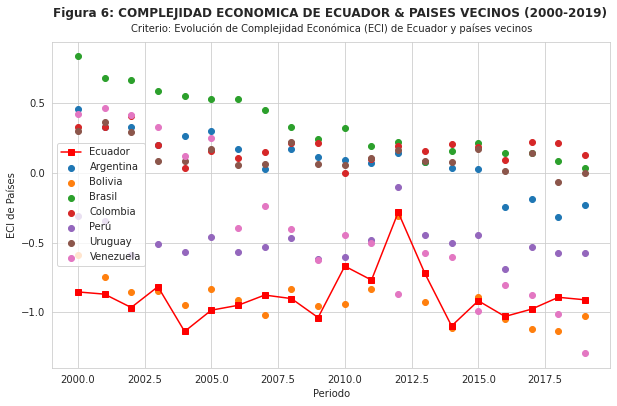

In [36]:
plt.figure(figsize=(10,6))

plt.scatter("year", "Argentina", marker='o',data=table_eci, label = "Argentina")
plt.scatter("year", "Bolivia", marker='o' ,data=table_eci, label = "Bolivia")
plt.scatter("year", "Brazil", marker='o', data=table_eci, label = "Brasil")
plt.scatter("year", "Colombia", marker='o',data=table_eci, label = "Colombia")
plt.plot("year", "Ecuador", marker='s', linestyle='solid',color = 'red',data=table_eci, label = "Ecuador")
plt.scatter("year", "Peru", marker='o',data=table_eci, label = "Perú")
plt.scatter("year", "Uruguay", marker='o',data=table_eci, label = "Uruguay")
plt.scatter("year", "Venezuela", marker='o',data=table_eci, label = "Venezuela")

plt.title('Criterio: Evolución de Complejidad Económica (ECI) de Ecuador y países vecinos',  fontsize=10,
    pad=10,
    loc="center")
plt.suptitle(
    "Figura 6: COMPLEJIDAD ECONOMICA DE ECUADOR & PAISES VECINOS (2000-2019)",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)
plt.xlabel('Periodo')
plt.ylabel('ECI de Países')

plt.legend()
plt.show()

FIGURA 7: COMPLEJIDAD ECONÓMICA DE LOS PRODUCTOS DE EXPORTACIÓN (2019),


## Complejidad economica vs. gdp per capita 

#### importo la base de pbi per capita del banco mundial


In [37]:
base_gdppc_countries = pd.read_csv("/content/drive/MyDrive/eci/base/gpd_per_capita_countries_db.csv").copy()
print('dataframe del gpd per capita de paises cargado')

dataframe del gpd per capita de paises cargado


In [38]:
base_gdppc_countries.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6283.00,7567.25,9274.51,10767.40,11638.73,12850.22,13657.67,14970.15,16675.28,17140.43,17375.23,18713.43,19742.32,19833.83,21023.16,20913.30,21377.10,22050.83,24104.65,24975.67,25833.45,27665.43,29011.56,25739.14,24452.93,26044.44,25609.96,26515.68,26942.31,28421.39,28451.27,29326.71,30220.59,31650.76,24487.86,29342.10
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.91,162.55,172.00,199.18,179.38,198.22,209.41,211.70,224.23,249.58,260.11,278.75,293.08,370.41,444.72,459.90,444.08,489.85,530.37,600.37,738.87,732.92,681.65,691.99,615.41,508.69,552.54,654.32,697.22,722.43,817.15,858.30,728.77,704.74,697.18,762.84,739.47,757.85,696.37,669.69,706.99,628.20,626.56,812.95,985.53,1120.45,1226.18,1369.81,1428.33,1411.58,1643.55,1792.85,1760.22,1731.80,1719.81,1540.85,1432.11,1613.79,1550.18,1500.23,1353.77,1537.34
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.37,62.44,60.95,82.02,85.51,105.24,143.10,167.17,134.01,134.25,162.64,166.22,141.37,149.74,181.60,194.67,205.67,232.78,255.05,284.76,291.65,311.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.53,200.46,221.66,255.06,274.00,375.08,387.85,443.85,554.60,621.91,663.14,651.99,628.15,592.48,520.25,530.15,502.06,500.52,516.87,368.75
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.98,112.05,117.73,122.28,130.60,137.19,142.90,127.30,128.37,142.33,193.57,167.55,198.37,239.53,330.07,374.01,439.83,450.07,477.19,577.54,709.84,1299.90,1120.58,805.02,649.02,644.34,578.81,578.33,555.92,505.33,589.16,553.59,542.66,441.61,375.67,458.83,519.25,510.89,509.26,524.10,520.79,529.58,619.77,697.91,841.36,1000.87,1241.85,1417.61,1681.48,1463.39,1675.74,1856.69,1953.41,2149.30,2243.27,1876.62,1645.02,1585.91,1731.31,1749.30,1683.44,1757.03
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711.94,643.05,620.36,623.53,637.52,757.58,684.44,755.92,792.86,891.74,949.29,867.12,657.65,442.45,329.69,398.12,523.27,514.31,423.39,387.69,556.88,527.46,872.66,982.81,1254.70,1900.72,2597.96,3121.35,4081.72,3123.70,3496.78,4511.15,4962.55,5101.98,5059.08,3100.83,1709.52,2283.21,2487.50,2142.24,1603.99,1953.53


#### limpio la base

In [39]:
def gdppc_countries(data):

    data = data.filter(items=['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']).copy()
    # years = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
    # vecinos
    # df_eci_vecinos = df_ec[(df_ec['year'].isin(years)) & (df_ec['country_name'].isin(vecinos))].copy()

    data=data.rename(columns={"Country Name": "country_name", "Country Code": "country_code"}).copy()
    data=data.melt(id_vars=["country_name", "country_code"], var_name="year", value_name="Value").copy()
    data=data.rename(columns={"Value": "gdp_per_capita"}).copy()
    data =  data.loc[data["country_name"] != 'Latin America & the Caribbean (IDA & IBRD countries)' ].copy()
    data =  data.loc[data["country_name"] != 'Europe & Central Asia (excluding high income)' ].copy()
    data =  data.loc[data["country_name"] != 'World' ].copy()
    data =  data.loc[data["country_name"] != 'Fragile and conflict affected situations'].copy()
    data =  data.loc[data["country_name"] != 'Pacific island small states'].copy()
    data =  data.loc[data["country_name"] != 'OECD members'].copy()
    data =  data.loc[data["country_name"] != 'Caribbean small states'].copy()
    data =  data.loc[data["country_name"] != 'Heavily indebted poor countries (HIPC)'].copy()
    data =  data.loc[data["country_name"] != 'Small states'].copy()
    data =  data.loc[data["country_name"] != 'East Asia & Pacific (excluding high income)'].copy()
    data =  data.loc[data["country_name"] != 'Europe & Central Asia (IDA & IBRD countries)'].copy()
    ## No se consideran aquellos países indicados por region
    data =  data.loc[(data["country_name"] != 'Lower middle income') & (data["country_name"] != 'IBRD only')& (data["country_name"] != 'IDA total') & (data["country_name"] != 'East Asia & Pacific')
    &(data['country_name']!='Sub-Saharan Africa (excluding high income)')&(data['country_name']!='Low & middle income')&(data['country_name']!='Not classified')
    &(data['country_name']!='Middle East & North Africa (IDA & IBRD countries)')&(data['country_name']!='Post-demographic dividend')&(data['country_name']!='Latin America & Caribbean')
    &(data['country_name']!='Middle income')&(data['country_name']!='East Asia & Pacific (IDA & IBRD countries)')&(data['country_name']!='IDA & IBRD total') &(data['country_name']!='South Asia (IDA & IBRD)')
    &(data['country_name']!='South Asia')
    &(data['country_name']!='Least developed countries: UN classification')].copy()
## Se reemplaza actualiza los nombres de paises de la base del Banco Mundial para igualarlos con los de la base CONTRADE
    data=data.replace("Korea, Dem. People's Rep.", "North Korea").copy()
    data=data.replace("Korea, Rep.", "South Korea").copy()
    data=data.replace("Cote d'Ivoire", "Côte d'Ivoire").copy()
    data=data.replace("Congo, Dem. Rep.", "Congo (Democratic Republic of the)").copy()
    data=data.replace("Congo, Rep.", "Congo").copy()
    data=data.replace("Curacao", "Curaçao").copy()
    data=data.replace("British Virgin Islands","Virgin Islands (British)").copy()
    data=data.replace("Egypt, Arab Rep.","Egypt").copy()
    data=data.replace("Hong Kong SAR","Hong Kong").copy()
    data=data.replace("United States","United States of America").copy()
    data=data.replace("St. Vincent and the Grenadines","Saint Vincent and the Grenadines").copy()
    data=data.replace("Venezuela, RB","Venezuela").copy()







# df_gdppc = df_gdppc.drop(df_gdppc.index[3254]).copy()
# df_gdppc = df_gdppc.drop(df_gdppc.index[3522]).copy() #Europe & Central Asia (excluding high income)
# df_gdppc = df_gdppc.drop(df_gdppc.index[1162]).copy() #Heavily indebted poor countries (HIPC)	
# df_gdppc = df_gdppc.drop(df_gdppc.index[[3960,3965,134,4703,1579,5193,2092,2454,449,3407,1395,1204,191,4143,1394,3993,3096,1527,3254,3522,1162,3428,4132,4454]]).copy() #Heavily indebted poor countries (HIPC),	Latin America & the Caribbean (IDA & IBRD countries)	
    data["year"]=data["year"].astype(np.int64).copy()

    return data



In [40]:
df_gdppc_countries=gdppc_countries(base_gdppc_countries)
df_gdppc_countries.sample(n=10)
df_gdppc_countries.shape
df_gdppc_countries.info()

,country_name,country_code,year,gdp_per_capita
437,Namibia,NAM,2001,1916.25
3848,Kiribati,KIR,2014,1546.83
3041,Israel,ISR,2011,34354.72
5137,Ghana,GHA,2019,2167.91
693,Middle East & North Africa (excluding high income),MNA,2002,1775.55
2021,Malta,MLT,2007,19485.95
2152,Bosnia and Herzegovina,BIH,2008,4846.78
911,Iraq,IRQ,2003,809.85
4402,"Macao SAR, China",MAC,2016,71918.73
206,Sudan,SDN,2000,378.16


(4780, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4780 entries, 0 to 5319
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    4780 non-null   object 
 1   country_code    4780 non-null   object 
 2   year            4780 non-null   int64  
 3   gdp_per_capita  4592 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 186.7+ KB


#### me quedo solo con los años y países que me interesa analizar


In [51]:
def filtrarBaseGDPporVecinosyAnios (data):
  years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
  vecinos = ['Uruguay','Brazil','Ecuador','Peru','Colombia','Bolivia','Venezuela', 'Argentina']
  data_filtered = data[(data['year'].isin(years)) & (data['country_name'].isin(vecinos))].copy()
  return data_filtered




In [42]:
df_gdppc_vecinos=filtrarBaseGDPporVecinosyAnios(df_gdppc_countries).copy()
df_gdppc_vecinos.tail()

,country_name,country_code,year,gdp_per_capita
5099,Colombia,COL,2019,6438.06
5120,Ecuador,ECU,2019,6233.26
5240,Peru,PER,2019,6955.81
5304,Uruguay,URY,2019,17859.93
5308,Venezuela,VEN,2019,NaN


In [43]:
## se realiza un funcion para pivotear la table de gdp
def table_pivot_gdppc_vecinos (df):
  gdp_countries = pd.pivot_table(data=df,index=['year'],columns = ['country_name'],values=['gdp_per_capita']).copy()
  gdp_countries= gdp_countries.reset_index()

  gdp_countries.columns = gdp_countries.columns.droplevel(0)
  gdp_countries.rename(columns={'': "year"}, inplace=True)
  gdp_countries = gdp_countries.reset_index(drop=True)
  # table = table.drop(columns=['country_name'])
  return gdp_countries
  print("dataframe listo! ")
table_gdp = table_pivot_gdppc_vecinos(df_gdppc_vecinos)
df_eci_vecinos.head()

,country_name,product_name,product_code,export_value,year,pci,eci
1348976,Argentina,"Abrasive powder or grain; natural or artificial, on a base of textile material, of paper, paperboard or of other material, whether or not cut to shape or sewn or otherwise made up",6805,2271837,2000,4.02,0.46
1348977,Argentina,Accordions and similar instruments; mouth organs,9204,0,2000,2.17,0.46
1348978,Argentina,"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrostated derivatives",2911,41721,2000,2.15,0.46
1348979,Argentina,"Acids; carboxylic acid with additional oxygen function and their anhydrides, halides, peroxides, peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2918,28722324,2000,2.29,0.46
1348980,Argentina,"Acids; polycarboxylic acids, their anhydrides, halides, peroxides and peroxy-acids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2917,11996669,2000,2.08,0.46


In [44]:
## hacemos un merge dataframe de gdp con el dataframe de eci

df_tmp_gdp = pd.merge(df_gdppc_vecinos, df_eci_vecinos[['year','country_name','eci']],how='inner', on=['country_name','year']).copy()
# df_tmp_gdp.head()
resultado=df_tmp_gdp.groupby(['year','country_name','eci','gdp_per_capita'], as_index=False).count()
# resultado.head()
resultado['LOG_GDP'] = np.log2(resultado['gdp_per_capita']).copy()

df_2017 = resultado[ (resultado['year']==2017)].copy()
df_2017.head()

,year,country_name,eci,gdp_per_capita,country_code,LOG_GDP
134,2017,Argentina,-0.18,14613.04,1221,13.83
135,2017,Bolivia,-1.12,3280.01,1221,11.68
136,2017,Brazil,0.15,9896.68,1221,13.27
137,2017,Colombia,0.22,6450.32,1221,12.66
138,2017,Ecuador,-0.98,6246.40,1221,12.61


Text(-0.1847679617135901, 13.834968897311366, 'Argentina')

Text(-1.1169066927541176, 11.679483711956523, 'Bolivia')

Text(0.1452386134799629, 13.272729613074418, 'Brazil')

Text(0.2204818860625927, 12.655154926170477, 'Colombia')

Text(-0.9773904748764699, 12.608810224735146, 'Ecuador')

Text(-0.53300587579129, 12.704829658700367, 'Peru')

Text(0.14484374003873732, 14.196124698041233, 'Uruguay')

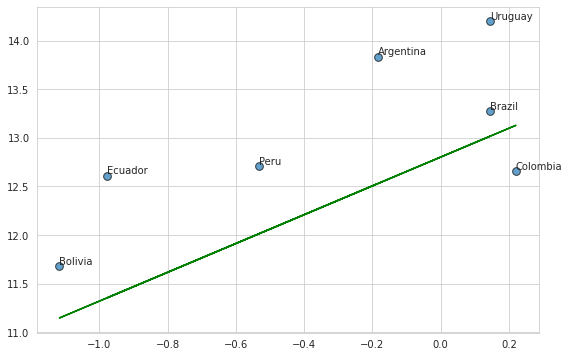

In [82]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 6))

z=df_2017['eci']
y=df_2017['LOG_GDP']
n=df_2017['country_name']
# Add scatterplot
# fig, ax = plt.subplots()

plt.scatter(z, y, s=60, alpha=0.7, edgecolors="k");

m, b = np.polyfit(df_2017['eci'], df_2017['LOG_GDP'], 1)



plt.plot(df_2017['eci'], mw*df_2017['eci']+bw, color='green')

# add labels to all points
for (zi, yi,ni) in zip(z, y,n):
    plt.text(zi, yi, ni, va='bottom', ha='left')

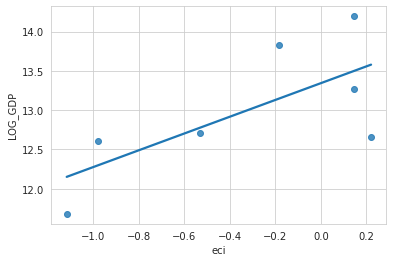

In [46]:
import seaborn as sns

#create scatterplot with regression line and confidence interval lines
# sns.regplot(df_2017['eci'], df_2017['LOG_GDP'])
sns.regplot(df_2017['eci'], df_2017['LOG_GDP'], ci=None)


Scatter Plot con el resto del mundo

In [50]:

years=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

df_eci_mundo = df_ec[(df_ec['year'].isin(years))].copy()

In [53]:
def filtrarBaseGDPporAnios (data):
  years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
  data_filtered = data[(data['year'].isin(years))].copy()
  return data_filtered

df_gdppc_mundo=filtrarBaseGDPporAnios(df_gdppc_countries).copy()
df_gdppc_mundo.sample(n=5)

,country_name,country_code,year,gdp_per_capita
941,Lithuania,LTU,2003,5499.43
2429,Canada,CAN,2009,40876.31
2540,"Macao SAR, China",MAC,2009,39754.89
3214,Bahrain,BHR,2012,25102.73
3421,Chad,TCD,2012,969.62


In [55]:
df_gdp_world = pd.merge(df_gdppc_mundo, df_eci_mundo[['year','country_name','eci']],how='inner', on=['country_name','year']).copy()
# df_tmp_gdp.head()
result_world=df_gdp_world.groupby(['year','country_name','eci','gdp_per_capita'], as_index=False).count()
# resultado.head()
result_world['LOG_GDP'] = np.log2(result_world['gdp_per_capita']).copy()

dfw_2017 = result_world[ (result_world['year']==2017)].copy()
dfw_2017.head()

,year,country_name,eci,gdp_per_capita,country_code,LOG_GDP
3115,2017,Afghanistan,-1.30,530.15,1221,9.05
3116,2017,Albania,-0.29,4531.02,1221,12.15
3117,2017,Algeria,-0.74,4134.94,1221,12.01
3118,2017,American Samoa,0.79,12372.88,1221,13.59
3119,2017,Andorra,1.13,40632.48,1221,15.31


Text(0.5, 1.0, 'Fuentes: 1) ECI calculado para todos los países de la base. 2) Datos del PBI per cápita de la base del Banco Mundial')

Text(0.126, 0.96, 'Figura 7: RELACIÓN ENTRE ECI & LOG PBI PER CÁPITA DE LOS PAISES (2017)')

Text(-0.9773904748764699, 12.608810224735146, 'Ecuador')

Text(0.5, 0, 'ECI')

Text(0, 0.5, 'Log PBI per capita (2017 USD)')

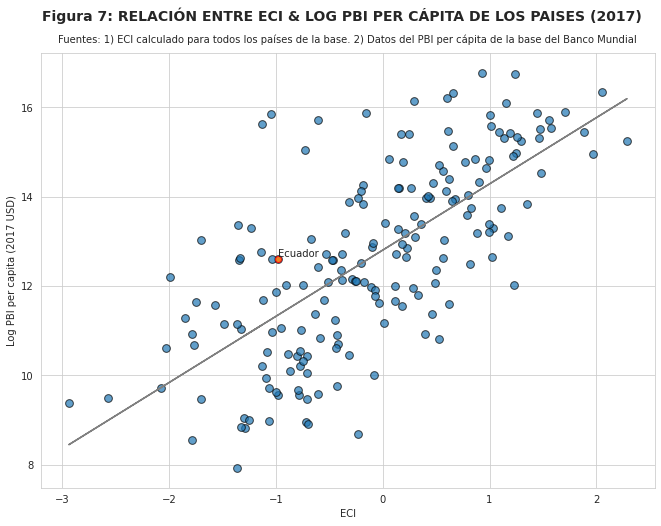

In [103]:
# Initialize layout
fig, ax = plt.subplots(figsize = (11, 8))

zw=dfw_2017['eci']
yw=dfw_2017['LOG_GDP']
nw=dfw_2017['country_name']
# Add scatterplot
# fig, ax = plt.subplots()

plt.scatter(zw, yw, s=60, alpha=0.7, edgecolors="k",cmap='gray');

# plt.scatter(random(10), random(10), marker='d', 
#                     color=colors[0],label='Label 5')

mw, bw = np.polyfit(dfw_2017['eci'], dfw_2017['LOG_GDP'], 1)
# plt.title("Figura 7: RELACIÓN ENTRE ECI Y LOG PBI PER CÁPITA (2017)",fontsize=12,fontweight="bold")
plt.title('Fuentes: 1) ECI calculado para todos los países de la base. 2) Datos del PBI per cápita de la base del Banco Mundial',  fontsize=10,
    pad=10,
    loc="center")
plt.suptitle(
    "Figura 7: RELACIÓN ENTRE ECI & LOG PBI PER CÁPITA DE LOS PAISES (2017)",
    fontsize=14,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# Se añade el label y el color sólo a Ecuador. 
for (zi, yi,ni) in zip(zw, yw,nw):
        if ni == "Ecuador":
          plt.scatter(zi, yi, alpha=0.9, edgecolors="r",cmap='red')
          plt.text(zi, yi, ni, va='bottom', ha='left')

      

plt.xlabel('ECI')
plt.ylabel('Log PBI per capita (2017 USD)')



plt.plot(dfw_2017['eci'], mw*dfw_2017['eci']+bw, color='gray')



# 4. Cálculos de Sofisticación

According to *Hausmann Hwang & Rodrik’s (2005)*, the authors measure this sophistication indirectly by examining the wages of countries
who are intensive exporters of each product. First, they measure the sophistication of each
product, which they call PRODY, which is the revealed comparative advantage (RCA)-weighted
GDP per capita of each country that exports the good:



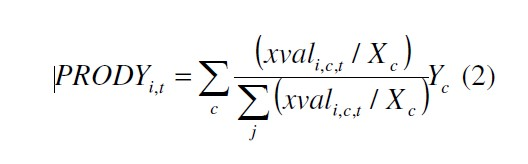

This is a measure calculated as the GDP per
capita of countries that produce it, weighted by their revealed comparative advantage in
that product. As mentioned above, Hausmann Hwang & Rodrik use this product-level variable to calculate the level of sophistication of a country’s export basket, EXPYc,t as
the PRODYi,t for each component of the country’s export basket weighted by its share.

In [ ]:
def calc_prody(data,pais_col,prod_col,anio_col,export_col, gdp_per_capita_col):
    
    """
      Función que calcula el valor de Prody
      Xc: equals total exports by country c, 
      Yc: equals GDP per capita of country c.

    """
    """
      Where xvali,c,t equals exports of good i by country c in year t

    """
    print('En esta parte de la funcion se crea la combinación de producto-i, país-c y tiempo-t')
    df_prody = pd.DataFrame(list(product(data[anio_col].unique(),data[pais_col].unique(),data[prod_col].unique())))
    df_prody.columns=[anio_col,pais_col,prod_col]
    print('Se procede a fusionar los datos')
    df_prody = pd.merge(df_prody,data[[anio_col,pais_col,prod_col,export_col,gdp_per_capita_col]],how='left',on=[anio_col,pais_col,prod_col])
    df_prody.loc[df_prody[export_col].isnull(),export_col] = 0

    print('Se hace el calculo de RCA')

    df_prody['Xcpt'] = df_prody[export_col]
    df_prody['Xct'] = df_prody.groupby([pais_col, anio_col])[export_col].transform(sum)
    df_prody['Xpt'] = df_prody.groupby([prod_col, anio_col])[export_col].transform(sum)
    df_prody['Xt'] = df_prody.groupby([anio_col])[export_col].transform('sum')
    # df_prody['Yc'] = df_prody.groupby([pais_col, anio_col])[gdp_per_capita_col]
    df_prody['Yc'] = df_prody[gdp_per_capita_col]
    # yc_value = data.groupby(anio_col)[]
    # df_xval = data.groupby(export_col).transform('sum')
    df_prody['RCAcpt'] = (df_prody['Xcpt']/df_prody['Xct'])/(df_prody['Xpt']/df_prody['Xt']) #--> ecuación de las RCA
    df_prody.loc[df_prody['RCAcpt'].isnull(),'RCAcpt'] = 0

    print('Se hace el calculo de PRODY')

    df_prody['PRODY'] = ((df_prody['Xcpt']/df_prody['Xct'])/(df_prody['Xpt']/df_prody['Xt']))*df_prody['Yc'] 

    #retiro las propiedadades del dataframe 
    df_prody.drop(['Xcpt','Xct','Xpt','Xt','Yc'],axis=1,inplace=True,errors='ignore')


    return df_prody



In [ ]:
# !git --version
# !git config --global user.name "descandon88"
# !git config --global user.email "david.escandon.v@gmail.com"


In [ ]:
df_prody = calc_prody(data=df_merge,pais_col='country_name',prod_col='product_name',anio_col='year',export_col='export_value',gdp_per_capita_col='gdp_per_capita').copy()
df_prody.sample(n=10)

En esta parte de la funcion se crea la combinación de producto-i, país-c y tiempo-t
Se procede a fusionar los datos
Se hace el calculo de RCEA
Se hace el calculo de PRODY


,year,country_name,product_name,export_value,gdp_per_capita,RCAcpt,PRODY
4574007,2019,Spain,"Bells, gongs and the like; non-electric, statuettes, other ornaments, photograph, picture, similar frames, mirrors, of base metal",28767564.00,29581.52,0.66,19604.64
426327,2001,Seychelles,Halogenated derivatives of hydrocarbons,0.00,7663.14,0.00,0.00
4102228,2017,Ethiopia,"Binoculars, monoculars, other optical telescopes, mountings therefor; other astronomical instruments, mountings therefor, but not including instruments for radio-astronomy",7904.00,755.75,0.04,28.97
2261120,2009,Madagascar,"Fabrics; knitted or crocheted, other than those of heading no. 6001",2148098.00,455.41,1.57,715.09
2955221,2012,Kazakhstan,"Articles of gut (other than silk-worm gut), of goldbeater's skin, of bladders or of tendons",0.00,12386.70,0.00,0.00
1450249,2006,Belize,"Alloy steel in ingots or other primary forms, semi-finished products of other alloy steel",0.00,5475.72,0.00,0.00
1084240,2004,Mongolia,"Roundabouts, swings, shooting galleries, other fairground amusements, travelling circuses, travelling menageries and travelling theatres",1707.00,784.91,0.03,23.58
2286632,2009,Nauru,Flours and meals of oil seeds or oleaginous fruits; other than those of mustard,0.00,NaN,0.00,NaN
3166169,2013,Guinea-Bissau,Radioactive chemical elements and radioactive isotopes (including the fissile or fertile chemical elements and isotopes); and their compounds; mixtures and residues containing these products,0.00,616.16,0.00,0.00
231151,2000,Namibia,"Margarine; edible mixtures or preparations of animal or vegetable fats or oils or of fractions of different fats or oils of this chapter, other than edible fats or oils of heading no. 1516",186479.00,2156.10,1.13,2429.42


In [ ]:
df_prody[ (df_prody['country_name']=='Ecuador')].sort_values(by=['year'],ascending=True)[['product_name','export_value','year','gdp_per_capita','RCAcpt','PRODY']].copy()

,product_name,export_value,year,gdp_per_capita,RCAcpt,PRODY
62100,"Horses, asses, mules and hinnies; live",56778.00,2000,1451.53,0.03,50.12
62932,"Stainless steel bars and rods, hot-rolled, in irregularly wound coils",330106.00,2000,1451.53,0.42,613.76
62931,Stainless steel; flat-rolled products of width less than 600mm,0.00,2000,1451.53,0.00,0.00
62930,Stainless steel; flat-rolled products of width of 600mm or more,146909.00,2000,1451.53,0.01,21.62
62929,Stainless steel in ingots or other primary forms; semi-finished products of stainless steel,0.00,2000,1451.53,0.00,0.00
...,...,...,...,...,...,...
4569728,Safety fuses; detonating fuses; percussion or detonating caps; igniters; electric detonators,0.00,2019,6233.26,0.00,0.00
4569727,"Prepared explosives, other than propellent powders",0.00,2019,6233.26,0.00,0.00
4569726,Explosives; propellent powders,0.00,2019,6233.26,0.00,0.00
4569733,"Photographic film in rolls, sensitised, unexposed, of any material other than paper, paperboard or textiles; instant print film in rolls, sensitised, unexposed",0.00,2019,6233.26,0.00,0.00


##Cálculo de EXPY


This product-level measure of sophistication is then used to measure the sophistication of
a country’s export basket as a whole. The authors call this measure EXPY. EXPY is simply the
PRODY of each good (i) that country c exports, weighted by that good’s share in the country’s
export basket (Xc). It represents the income level associated with a country’s overall export
package.

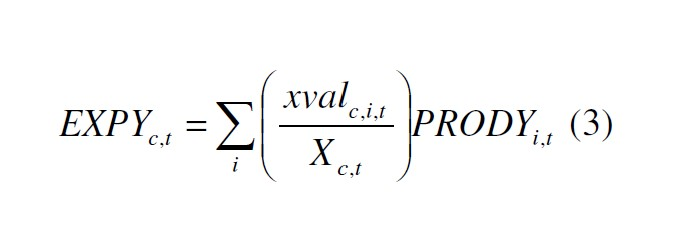

In [ ]:
def calc_expy(data,pais_col,prod_col,anio_col,export_col, gdp_per_capita_col):
  """
  Función para el cálculo de EXPY c,t
  """
  print('En esta parte de la funcion se crea la combinación de producto-i, país-c y tiempo-t')
  df_expy = pd.DataFrame(list(product(data[anio_col].unique(),data[pais_col].unique(),data[prod_col].unique())))
  df_expy.columns=[anio_col,pais_col,prod_col]
  print('Se procede a fusionar los datos')